##Contexto

O objetivo deste estudo é explorar o conceito de Análise de Regressão Multivariada.

##Imports

In [1]:
# Imports
#install.packages('ggpubr')
#install.packages('ggfortify')
#install.packages('GGally')
#install.packages("leaps")
#install.packages("MASS")


require("leaps")

library(ggplot2)
library(ggpubr)
library(ggfortify)
library(GGally)
library(readr)
library(MASS)
library(dplyr)

Loading required package: leaps

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Import csv
autos_padrao <- read.csv("https://raw.githubusercontent.com/digonfernan/r-regressao-multipla-autos/main/autos.csv", sep=";", header=T)

In [3]:
# Novo dataframe com as variáveis necessárias
autos <- autos_padrao[,c('price','horsepower','length','engine.size','city.mpg')]

In [4]:
# Converte em número
convert_number <- function(x){
    x <- as.character(x)
    x <- gsub(pattern = ",", replacement = ".",x = x, fixed = TRUE)
    x <- as.numeric(x)
    return(x)
}

In [5]:
autos <- apply(autos, 2, convert_number)

In [6]:
# Converte a matriz em dataframe
autos=as.data.frame(autos)

In [7]:
# Troca o nome das colunas
names(autos) <- c('preco','potencia','comprimento','tamanho_motor','consumo_cidade')

In [8]:
# Visualiza
head(autos)
tail(autos)

,preco,potencia,comprimento,tamanho_motor,consumo_cidade
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13495,111,168.8,130,21
2,16500,111,168.8,130,21
3,16500,154,171.2,152,19
4,13950,102,176.6,109,24
5,17450,115,176.6,136,18
6,15250,110,177.3,136,19


,preco,potencia,comprimento,tamanho_motor,consumo_cidade
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
188,18950,162,188.8,130,17
189,16845,114,188.8,141,23
190,19045,160,188.8,141,19
191,21485,134,188.8,173,18
192,22470,106,188.8,145,26
193,22625,114,188.8,141,19


In [9]:
# Estrutura
str(autos)

'data.frame':	193 obs. of  5 variables:
 $ preco         : num  13495 16500 16500 13950 17450 ...
 $ potencia      : num  111 111 154 102 115 110 110 110 140 101 ...
 $ comprimento   : num  169 169 171 177 177 ...
 $ tamanho_motor : num  130 130 152 109 136 136 136 136 131 108 ...
 $ consumo_cidade: num  21 21 19 24 18 19 19 19 17 23 ...


In [10]:
# Sumário
summary(autos)

     preco          potencia      comprimento    tamanho_motor  
 Min.   : 5118   Min.   : 48.0   Min.   :141.1   Min.   : 61.0  
 1st Qu.: 7738   1st Qu.: 70.0   1st Qu.:166.3   1st Qu.: 98.0  
 Median :10245   Median : 95.0   Median :173.2   Median :120.0  
 Mean   :13285   Mean   :103.5   Mean   :174.3   Mean   :128.1  
 3rd Qu.:16515   3rd Qu.:116.0   3rd Qu.:184.6   3rd Qu.:146.0  
 Max.   :45400   Max.   :262.0   Max.   :208.1   Max.   :326.0  
 consumo_cidade 
 Min.   :13.00  
 1st Qu.:19.00  
 Median :25.00  
 Mean   :25.33  
 3rd Qu.:30.00  
 Max.   :49.00  

In [11]:
# Correlação
cor(autos)

,preco,potencia,comprimento,tamanho_motor,consumo_cidade
preco,1.0000000,0.8124532,0.6959279,0.8887785,-0.7066180
potencia,0.8124532,1.0000000,0.5896502,0.8453249,-0.8336154
comprimento,0.6959279,0.5896502,1.0000000,0.6869976,-0.7021426
tamanho_motor,0.8887785,0.8453249,0.6869976,1.0000000,-0.7163780
consumo_cidade,-0.7066180,-0.8336154,-0.7021426,-0.7163780,1.0000000


#Estudo

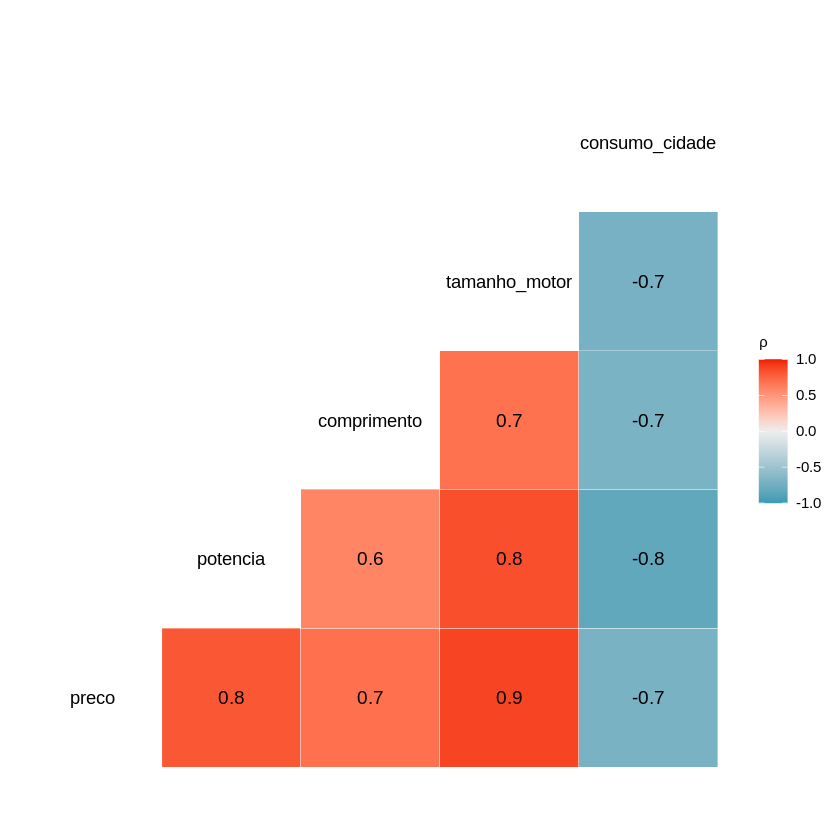

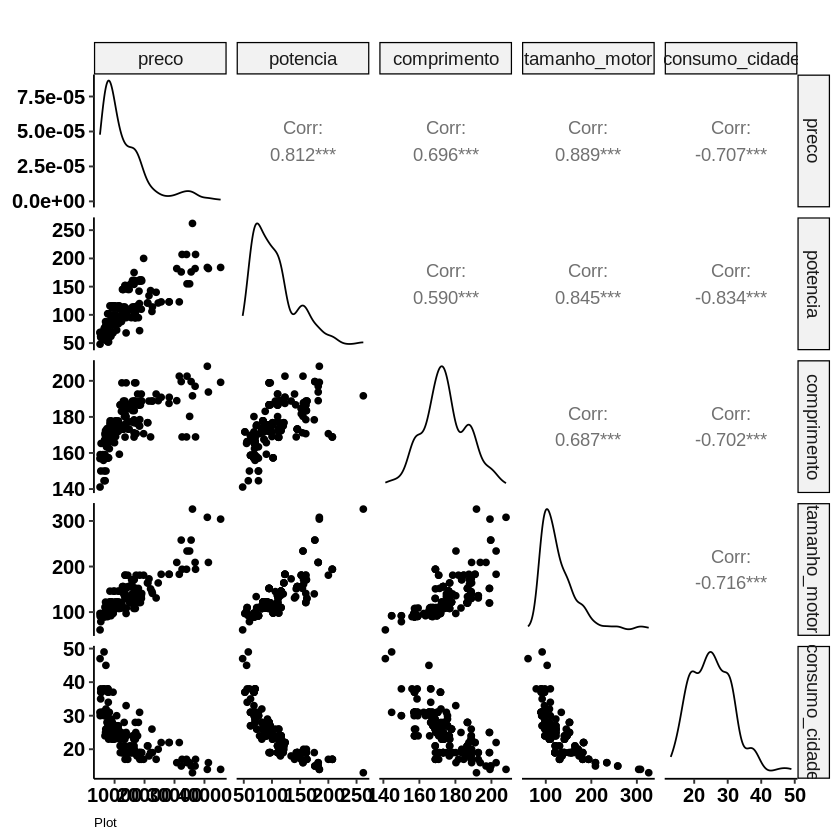

In [12]:
# Plot
ggcorr(autos, palette = "RdYlGn", name = bquote(rho),
      label = TRUE, label_color = "black") +
      theme(plot.caption = element_text(hjust = 0, size = 8))

ggpairs(autos, columns = 1:ncol(autos), title = "", axisLabels = "show") +
  theme(axis.text.x = element_text(angle=90, vjust=0.5, size=10)) +
  theme_pubr() + labs_pubr() +
  labs(caption = "Plot") + labs_pubr() +
  theme(plot.caption = element_text(hjust = 0, size = 8))

In [13]:
# Modelo de regressão linear com o price como variável resposta
modelo <- lm(preco ~ potencia + comprimento + tamanho_motor + consumo_cidade, data = autos)

In [14]:
# Sumário
summary(modelo)


Call:
lm(formula = preco ~ potencia + comprimento + tamanho_motor + 
    consumo_cidade, data = autos)

Residuals:
    Min      1Q  Median      3Q     Max 
-9697.0 -1745.7    24.9  1389.4 12904.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -28480.00    7114.51  -4.003 8.99e-05 ***
potencia           52.74      16.62   3.174 0.001756 ** 
comprimento       114.58      32.30   3.548 0.000491 ***
tamanho_motor     115.32      12.92   8.922 4.06e-16 ***
consumo_cidade     61.51      83.05   0.741 0.459849    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3499 on 188 degrees of freedom
Multiple R-squared:  0.8168,	Adjusted R-squared:  0.8129 
F-statistic: 209.5 on 4 and 188 DF,  p-value: < 2.2e-16


In [15]:
# Remove variavéis com baixa significância
# Remove Consumo Cidade
modelo <- lm(preco ~ potencia + comprimento + tamanho_motor, data = autos)

In [16]:
# Remove Comprimento
modelo <- lm(preco ~ potencia + tamanho_motor, data = autos)

In [17]:
# Função automática para encontrar o melhor conjunto de preditoras
nulo <- lm(preco ~ 1, data = autos)

In [18]:
# Modelo Completo
completo <- lm(preco ~ potencia + comprimento + tamanho_motor + consumo_cidade, data = autos)

In [19]:
# Passo
result_step <- step(completo, data = autos, direction = "backward", trace = FALSE)

In [20]:
# Visualiza
show(result_step)


Call:
lm(formula = preco ~ potencia + comprimento + tamanho_motor, 
    data = autos)

Coefficients:
  (Intercept)       potencia    comprimento  tamanho_motor  
     -24227.1           44.6          102.5          117.3  



In [21]:
# Passo
result_step <- step(completo, data = autos, direction = "forward", trace = FALSE)

In [22]:
# Visualiza
show(result_step)


Call:
lm(formula = preco ~ potencia + comprimento + tamanho_motor + 
    consumo_cidade, data = autos)

Coefficients:
   (Intercept)        potencia     comprimento   tamanho_motor  consumo_cidade  
     -28480.00           52.74          114.58          115.32           61.51  



In [23]:
# Passo
result_step <- step(completo, data = autos, direction = "both", trace = FALSE)

In [24]:
# Visualiza
show(result_step)


Call:
lm(formula = preco ~ potencia + comprimento + tamanho_motor, 
    data = autos)

Coefficients:
  (Intercept)       potencia    comprimento  tamanho_motor  
     -24227.1           44.6          102.5          117.3  



In [25]:
# Melhor subset
subsets <- regsubsets(preco ~ potencia + comprimento + tamanho_motor + consumo_cidade, data = autos)

In [26]:
# Sumário
summary(subsets)

Subset selection object
Call: regsubsets.formula(preco ~ potencia + comprimento + tamanho_motor + 
    consumo_cidade, data = autos)
4 Variables  (and intercept)
               Forced in Forced out
potencia           FALSE      FALSE
comprimento        FALSE      FALSE
tamanho_motor      FALSE      FALSE
consumo_cidade     FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: exhaustive
         potencia comprimento tamanho_motor consumo_cidade
1  ( 1 ) " "      " "         "*"           " "           
2  ( 1 ) " "      "*"         "*"           " "           
3  ( 1 ) "*"      "*"         "*"           " "           
4  ( 1 ) "*"      "*"         "*"           "*"           

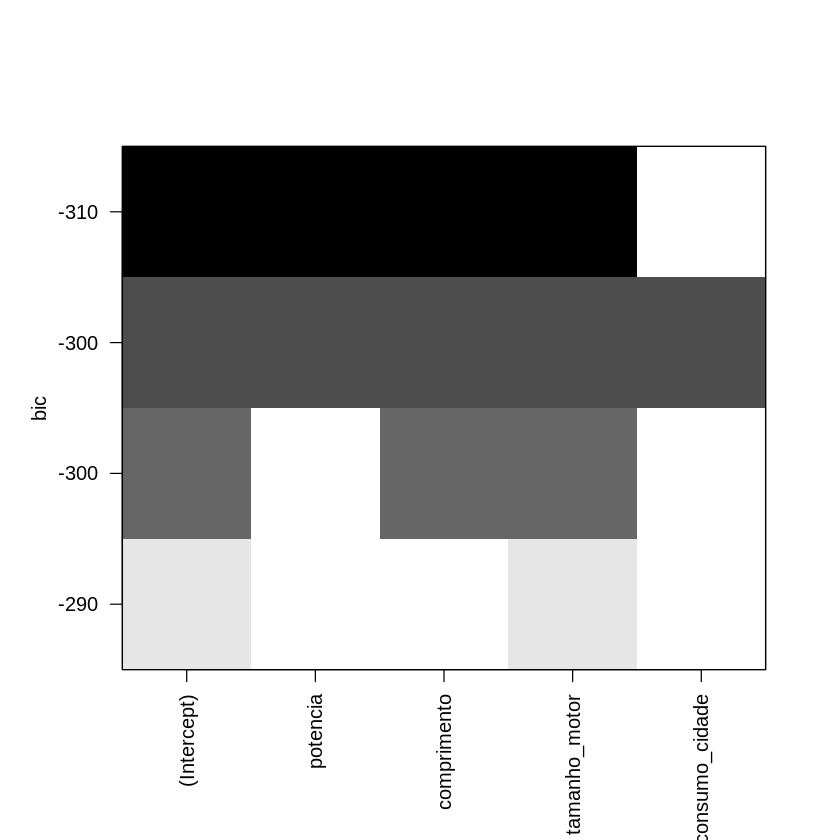

In [27]:
# Plot
plot(subsets)

In [28]:
# Melhor modelo
modelo <- lm(preco ~ potencia + tamanho_motor, data = autos)

In [29]:
# Multicolinearidade
car::vif(modelo)

potencia tamanho_motor 
     3.503538      3.503538

In [30]:
# Efeito moderador
modelo.preco <- lm(preco ~ potencia + tamanho_motor + potencia:tamanho_motor, data = autos)

In [31]:
# Sumário
summary(modelo.preco)


Call:
lm(formula = preco ~ potencia + tamanho_motor + potencia:tamanho_motor, 
    data = autos)

Residuals:
    Min      1Q  Median      3Q     Max 
-9486.9 -1744.5    65.8  1545.7 13476.1 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -1.186e+04  2.397e+03  -4.948 1.65e-06 ***
potencia                6.320e+01  1.908e+01   3.312  0.00111 ** 
tamanho_motor           1.624e+02  2.313e+01   7.022 3.82e-11 ***
potencia:tamanho_motor -1.511e-01  1.217e-01  -1.242  0.21583    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3604 on 189 degrees of freedom
Multiple R-squared:  0.8046,	Adjusted R-squared:  0.8015 
F-statistic: 259.4 on 3 and 189 DF,  p-value: < 2.2e-16


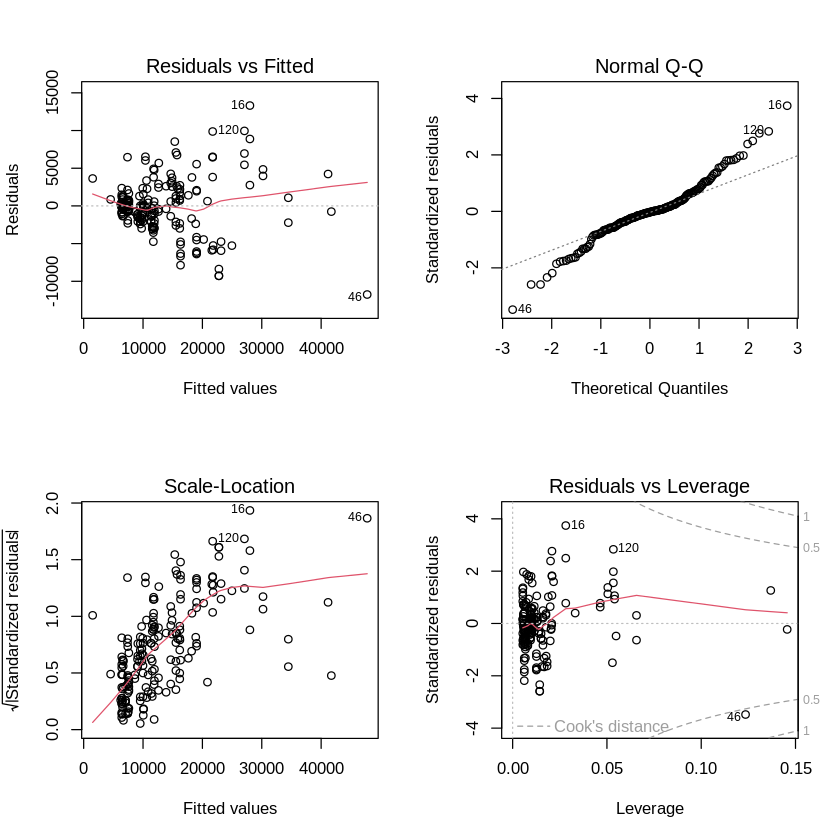

In [32]:
# Plot
par(mfrow=c(2,2))
plot(modelo)

In [33]:
# Testes de normalidade
modelo <- lm(preco ~ potencia + tamanho_motor, data = autos, na.action = na.omit)

In [34]:
shapiro.test(modelo$residuals)


	Shapiro-Wilk normality test

data:  modelo$residuals
W = 0.96554, p-value = 0.0001124


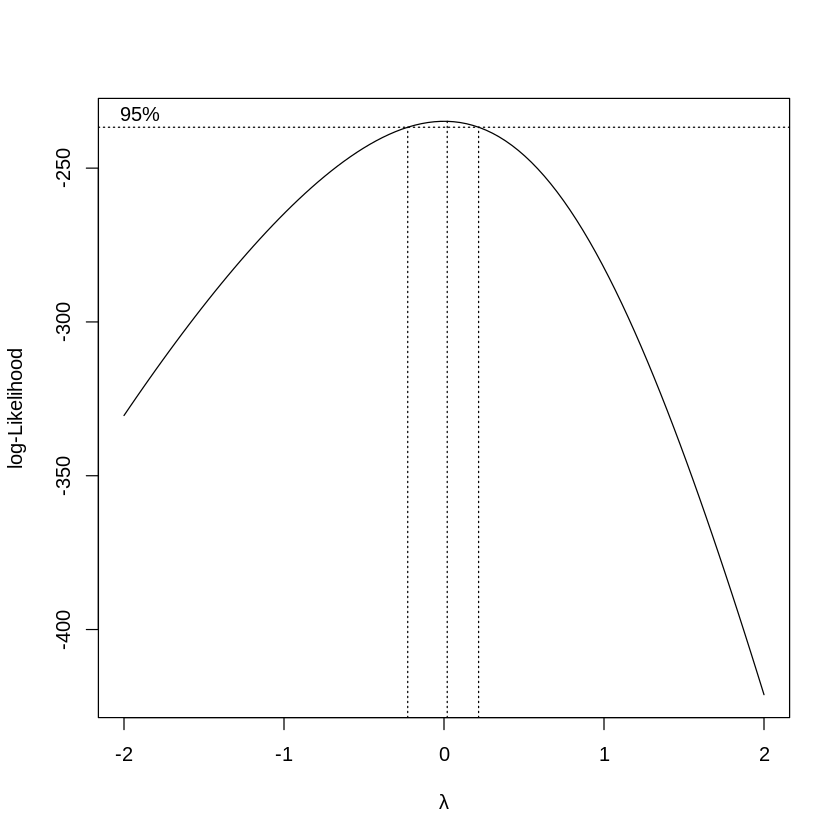

In [35]:
# Transforma a variável resposta
boxcox(modelo, data = autos, eps = 0.001, plotit=T)

In [36]:
bx <- boxcox(modelo, lambda=seq(-0.30, by=0.001), plotit = FALSE, eps = 0.001)
bx.df <- data.frame(x = bx$x,y = bx$y)
bx2.df <- bx.df[with(bx.df, order(-bx.df$y)),]
bx2.df[1,]

,x,y
,<dbl>,<dbl>
302,0.001,-234.7683


In [37]:
lambda <- round(bx2.df[1,"x"],4)

In [38]:
autos <- mutate(autos, preco_transf = (preco^lambda-1)/lambda)

In [39]:
# Visualiza
head(autos)
tail(autos)

,preco,potencia,comprimento,tamanho_motor,consumo_cidade,preco_transf
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13495,111,168.8,130,21,9.555439
2,16500,111,168.8,130,21,9.758422
3,16500,154,171.2,152,19,9.758422
4,13950,102,176.6,109,24,9.588917
5,17450,115,176.6,136,18,9.814949
6,15250,110,177.3,136,19,9.678875


,preco,potencia,comprimento,tamanho_motor,consumo_cidade,preco_transf
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
188,18950,162,188.8,130,17,9.898226
189,16845,114,188.8,141,23,9.779317
190,19045,160,188.8,141,19,9.903276
191,21485,134,188.8,173,18,10.025028
192,22470,106,188.8,145,26,10.070304
193,22625,114,188.8,141,19,10.077248


In [40]:
modelo <- lm(preco_transf ~ potencia + tamanho_motor, data = autos, na.action = na.omit)

In [41]:
# Sumário
summary(modelo)


Call:
lm(formula = preco_transf ~ potencia + tamanho_motor, data = autos, 
    na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97405 -0.17134 -0.03274  0.16925  0.60476 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.0148805  0.0578999 138.426  < 2e-16 ***
potencia      0.0054694  0.0008795   6.219 3.12e-09 ***
tamanho_motor 0.0063580  0.0008027   7.920 1.94e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2472 on 190 degrees of freedom
Multiple R-squared:  0.773,	Adjusted R-squared:  0.7706 
F-statistic: 323.5 on 2 and 190 DF,  p-value: < 2.2e-16


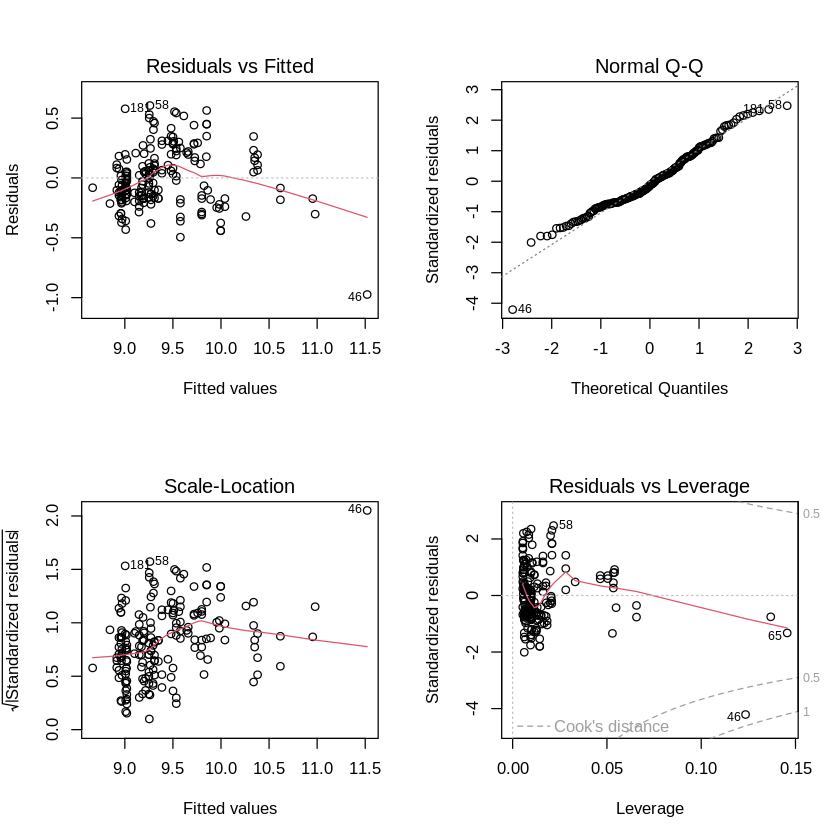

In [42]:
# Plot
par(mfrow=c(2,2))
plot(modelo)

In [43]:
shapiro.test(modelo$residuals)


	Shapiro-Wilk normality test

data:  modelo$residuals
W = 0.97412, p-value = 0.001218


In [44]:
# Transferências das variáveis preditoras
autos <- mutate(autos, potencia_transf = sqrt(potencia))

In [45]:
autos <- mutate(autos, tamanho_motor_transf = sqrt(tamanho_motor))

In [46]:
modelo <- lm(preco_transf ~ potencia_transf + tamanho_motor_transf, data = autos, na.action = na.omit)

In [47]:
# Sumário
summary(modelo)


Call:
lm(formula = preco_transf ~ potencia_transf + tamanho_motor_transf, 
    data = autos, na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.69954 -0.15469 -0.02096  0.15535  0.60782 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           6.37994    0.11381  56.056  < 2e-16 ***
potencia_transf       0.10430    0.01832   5.695 4.64e-08 ***
tamanho_motor_transf  0.17601    0.01943   9.057  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2323 on 190 degrees of freedom
Multiple R-squared:  0.7995,	Adjusted R-squared:  0.7974 
F-statistic: 378.9 on 2 and 190 DF,  p-value: < 2.2e-16


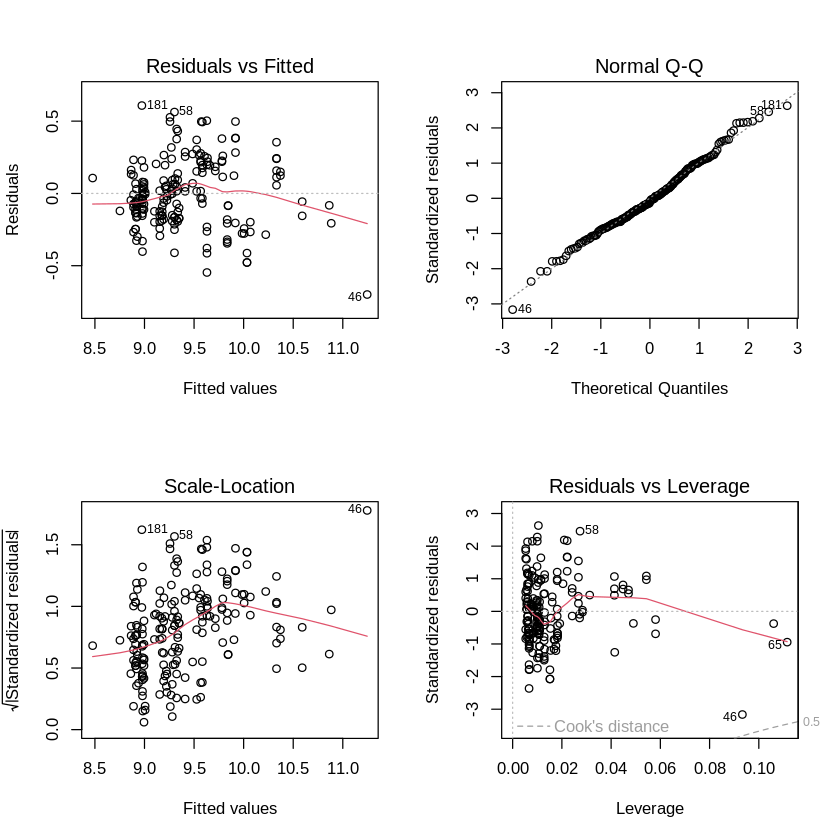

In [48]:
# Plot
par(mfrow=c(2,2))
plot(modelo)

In [49]:
shapiro.test(modelo$residuals)


	Shapiro-Wilk normality test

data:  modelo$residuals
W = 0.99168, p-value = 0.3355


In [50]:
# Sumário
summary(modelo)


Call:
lm(formula = preco_transf ~ potencia_transf + tamanho_motor_transf, 
    data = autos, na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.69954 -0.15469 -0.02096  0.15535  0.60782 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           6.37994    0.11381  56.056  < 2e-16 ***
potencia_transf       0.10430    0.01832   5.695 4.64e-08 ***
tamanho_motor_transf  0.17601    0.01943   9.057  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2323 on 190 degrees of freedom
Multiple R-squared:  0.7995,	Adjusted R-squared:  0.7974 
F-statistic: 378.9 on 2 and 190 DF,  p-value: < 2.2e-16


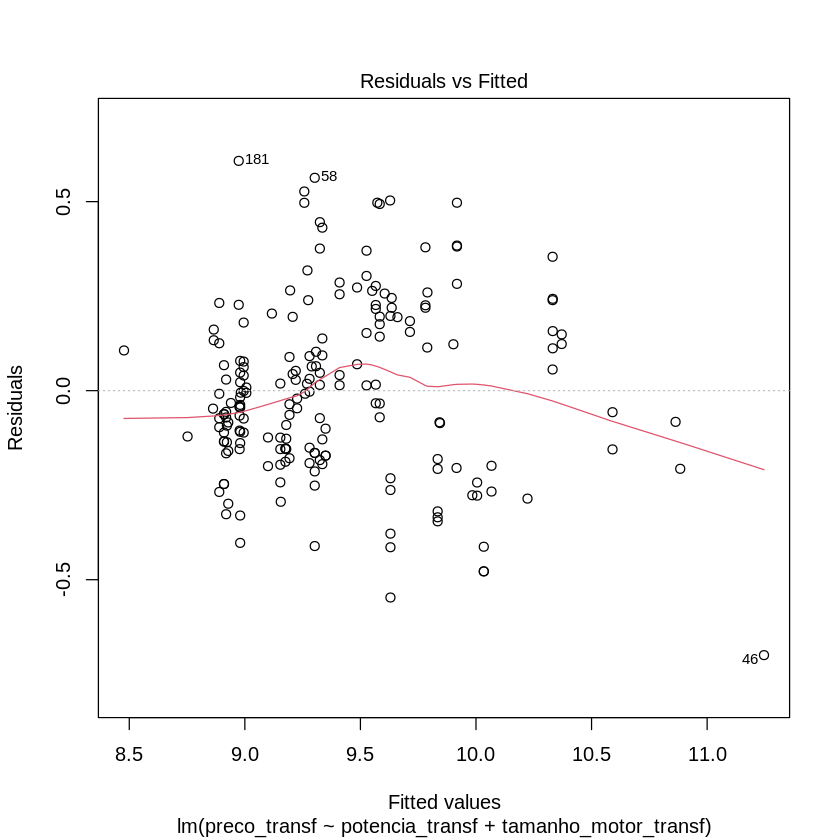

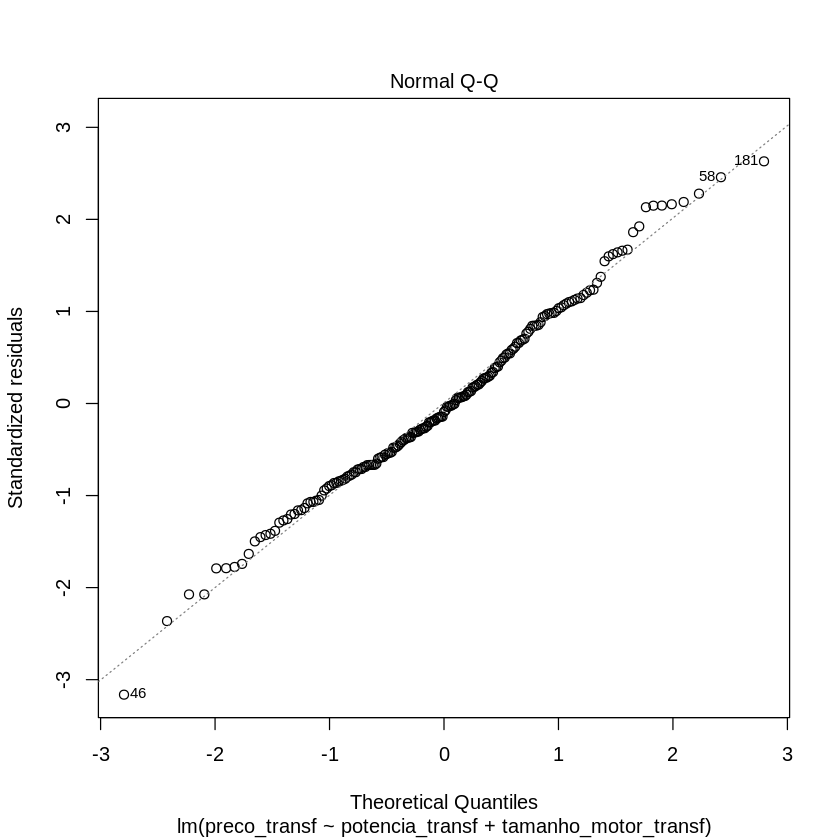

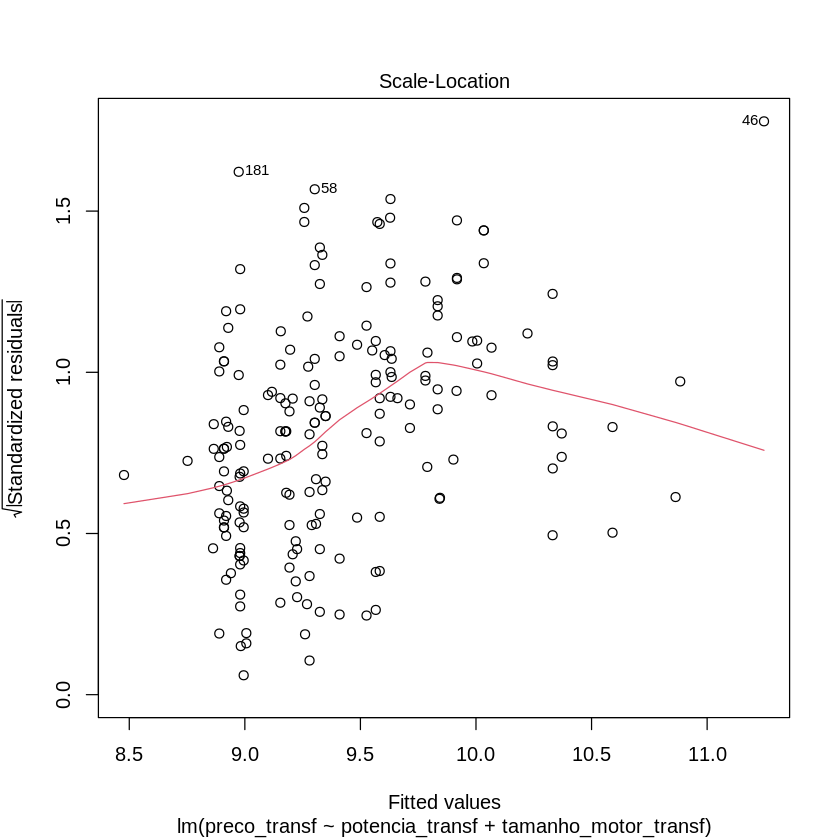

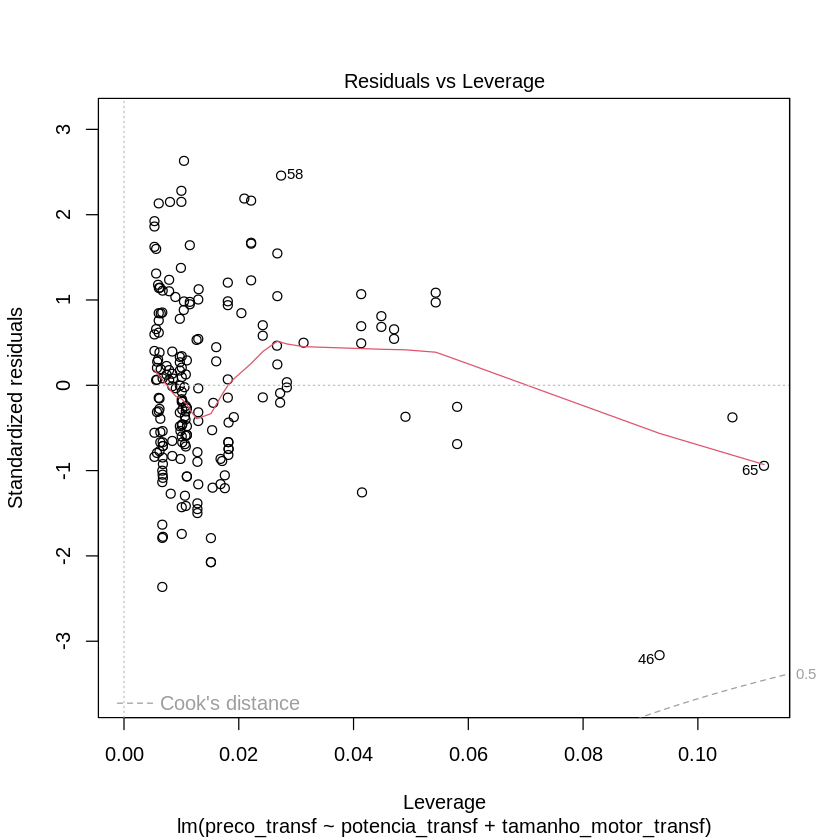

In [51]:
# Plot
plot(modelo)

In [52]:
# Remove as colunas não utilizadas
autos <- subset(autos, select = c(preco_transf, potencia_transf, tamanho_motor_transf))

In [53]:
# Separa o dataframe em treino e teste
set.seed(1234)
train <- sample_frac(autos, 0.8)
sid <- as.numeric(rownames(train))
test <- autos[-sid, ]

In [54]:
fitted.values <- predict(modelo, newdata = test, type = "response")
diferenca <- fitted.values - test$preco_transf
(rmse <- sqrt(mean(diferenca^2)))

[1] 0.2486044

#Conclusão

É possível concluir que o coeficiente de regressão para potência do motor tem valor de “0.10430”, indicando que a partir do aumento de 1 unidade no preço do carro está interligado também com o aumento na potência do motor de “0.10430”.

O coeficiente do tamanho do motor indica que a  partir do aumento de 1 unidade no preço do carro está interligado também com o aumento na potência do motor de “0.17601”.

As variáveis preditoras correspondem por 80% do valor da variância no preço do carro, assim como o valor do R quadrado tem uma variação pequena de 80%.